In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hiding text in a given image

# 1.  Reading an image

(281, 180, 3)


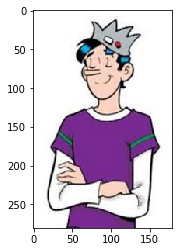

In [2]:
img_orig=plt.imread('Juggie.jpg')
plt.imshow(img_orig)
print(img_orig.shape)

In [4]:
#Check if img is a 3D array
print(img_orig.shape)

(281, 180, 3)


In [5]:
#The img contain 3 2-D arrays of dimentions (281,180)
r=img_orig[:,:,0]
g=img_orig[:,:,1]
b=img_orig[:,:,2]
print(r.shape, g.shape, b.shape)

(281, 180) (281, 180) (281, 180)


# 2. Convert the given image to gray scale

In [6]:
def to_gray(img):
    r, g, b =img[:,:,0], img[:,:,1],img[:,:,2]
    img_gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return img_gray

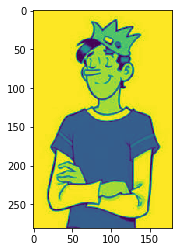

In [7]:
img_gray=to_gray(img_orig)
plt.imshow(img_gray)

In [8]:
#Is is gray-scale? 
print(img_gray.shape)

(281, 180)


In [9]:
#Convert the gray-scale image into an array of imtegers 
img_gray=np.array(img_gray, dtype='int')
print(np.max(img_gray))#max of 255
print(np.min(img_gray))# 0

254
0


# 3. Ask user to enter the text

In [10]:
Text= input('Enter text to hide \t:')

Enter text to hide 	:Hi there! I am Harsh Bhasin. what is your name?


# 4. Encode the text

In [12]:
def encode_text(text, key):
    code=[]
    for word in text: 
        for char in word: 
            ascii_char=ord(char)
            c=ascii_char+key
            #print(char, c)
            code.append(c)
    return code

In [13]:
key=3
L=encode_text(Text,key)

# 4.  Insert text in the image

In [14]:
n=len(L)
size_image=img_gray.shape[0]*img_gray.shape[1]

In [15]:
#Reshape image into (1, size_image)
reshape_img=np.reshape(img_gray,(1, size_image))
print(reshape_img.shape)

(1, 50580)


In [16]:
positions=np.random.randint(0,size_image,(1,len(L)))

In [17]:
reshape_img[0, positions]=L

In [18]:
new_image=np.reshape(reshape_img, (img_gray.shape[0],img_gray.shape[1]))

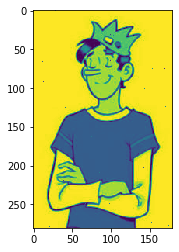

In [19]:
plt.imshow(new_image)

# 5. How to extract text from "new_image"

In [20]:
# We need 
#1. positions
#new_image
#Key 
#1. Convert new_image into 1-D array
new_image1D=np.reshape(new_image, (1, new_image.shape[0]*new_image.shape[1]))
print(new_image1D.shape)

(1, 50580)


In [21]:
L_extracted=new_image1D[0,positions]
print(L_extracted)

[[ 75 108  35 119 107 104 117 104  36  35  76  35 100 112  35  75 100 117
  118 107  35  69 107 100 118 108 113  49  35 122 107 100 119  35 108 118
   35 124 114 120 117  35 113 100 112 104  66]]


In [24]:
def decode(L_extracted, key):
    text_dec=''
    for i in L_extracted[0]: 
        ch=chr(i-key)
        text_dec+=ch
    return text_dec

In [26]:
text_dec=decode(L_extracted, key)
print(text_dec)

Hi there! I am Harsh Bhasin. what is your name?
